In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls

MyDrive


In [ ]:
%cd MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd
data1 = pd.read_csv('20221029-053129_annot_df_sorted_subclassed_slide_no_2.csv')
data2 = pd.read_csv('20221030-011825_annot_df_sorted_subclassed_MLFs_32_slide_no_2.csv')
data = pd.concat([data1, data2])

In [ ]:
data.sample(n=50)

,Unnamed: 0,key,uid,ctr,coord,lbl,guid,subcl
173,5,6,6,"[15300, 8437]",[[15275 8412]\r\n [15325 8462]],1,c6ffc256-a24d-4f1c-b951-db79e0928719,42
219,141,153,153,"[39061, 43797]",[[39036 43772]\r\n [39086 43822]],2,a36ab972-fe45-40f8-a84f-c37d5aed8c4e,42
52,166,1371,1371,"[21387, 6762]",[[21362 6737]\r\n [21412 6787]],1,78e1577f-8e89-4f16-9267-64b2a293d05b,42
51,165,1370,1370,"[16785, 4981]",[[16760 4956]\r\n [16810 5006]],1,2d389c23-2ed5-4706-a593-1ab9dc528984,42
199,102,107,107,"[23768, 35215]",[[23743 35190]\r\n [23793 35240]],1,ec7f40c8-5692-46f9-88eb-2cc2b3e62f94,42
150,191,1399,1399,"[8685, 35001]",[[ 8660 34976]\r\n [ 8710 35026]],1,d46ec076-84d0-4b33-9a4e-d0683f0ac490,9
129,36,38,38,"[30077, 18080]",[[30052 18055]\r\n [30102 18105]],1,6026b4f3-7cd2-4b4d-a88c-12010d18dcfd,42
211,24,26,26,"[21413, 11949]",[[21388 11924]\r\n [21438 11974]],1,63f825bc-1583-48d1-9460-1ed7a9511d7b,9
150,63,66,66,"[17915, 30376]",[[17890 30351]\r\n [17940 30401]],1,8dae9868-31a0-43dc-a07d-f371d4bf72cd,42
232,123,129,129,"[8155, 38270]",[[ 8130 38245]\r\n [ 8180 38295]],2,037d3d20-5fcc-49b2-a864-22b2bf896b9d,42


In [ ]:
%cd MITOS_WSI_CMC/

/content/drive/MyDrive/MITOS_WSI_CMC


In [ ]:
%cd databases

/content/drive/MyDrive/MITOS_WSI_CMC/databases


In [ ]:
data.head()
data['subcl'] = data['subcl'].replace(42,9)
data_filtered = data[data['subcl'] != 9]
data = data_filtered.copy()

In [ ]:
len(data)

98

In [ ]:
subclass_annotations = data.drop(['ctr', 'coord', 'guid'], axis = 1)
subclass_annotations.head()
len(subclass_annotations)

98

In [ ]:
%cd ..
!ls

/content/drive/MyDrive/MITOS_WSI_CMC
databases		    model	     RetinaNet-CMC-CODAEL.ipynb
Data_CMC-f		    models	     RetinaNet-CMC-MEL.ipynb
data_loader.py		    PatchClassifier  RetinaNet-CMC-ODAEL.ipynb
Evaluation.ipynb	    __pycache__      Setup.ipynb
Inference-RetinaNet-512.py  README.md	     title_CMC.png
lib			    results	     WSI


/content/drive/MyDrive/MITOS_WSI_CMC
0.png
2.png
7.png
1.png
4.png
5.png
3.png
6.png
9.png
10.png
8.png
11.png
12.png
13.png
15.png
16.png
14.png
20.png
19.png
18.png
17.png
21.png
22.png
23.png
24.png
26.png
25.png
29.png
27.png
28.png
30.png
31.png
32.png
33.png
35.png
34.png
36.png
37.png
38.png
39.png
40.png
41.png
42.png
44.png
43.png
46.png
45.png
48.png
47.png
50.png
49.png
51.png
52.png
55.png
54.png
53.png
57.png
56.png
58.png
59.png
60.png
61.png
62.png
63.png
64.png
65.png
66.png
67.png
69.png
68.png
70.png
71.png
72.png
73.png
74.png
75.png
76.png
79.png
77.png
78.png
80.png
81.png
83.png
82.png
84.png
85.png
86.png
87.png
88.png
89.png
90.png
91.png
92.png
93.png
94.png
96.png
95.png
97.png


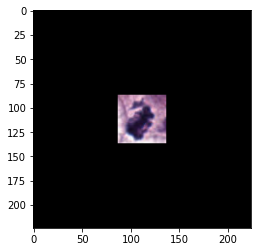

0     4
1     7
2     7
3     4
4     7
     ..
29    8
30    8
31    8
32    8
33    8
Name: subcl, Length: 98, dtype: int64


In [ ]:
from numpy.core.multiarray import packbits
#Load FSL CSV
#Load images
!pwd
import os
from os import listdir
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

labels = subclass_annotations['subcl']
imagelist = []

# get the path/directory
folder_dir = "WSI"

for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        print(images)
        temp = mpimg.imread('/content/drive/MyDrive/MITOS_WSI_CMC/WSI/' + str(images))
        plt.imshow(temp)
        temp = cv2.copyMakeBorder(temp, 87, 87, 87, 87, cv2.BORDER_CONSTANT)
        plt.imshow(temp)
        imagelist.append(temp)
#train_images, test_images = train_images / 255.0, test_images / 255.0

plt.imshow(imagelist[55])
plt.show()
print(labels)

In [ ]:
import numpy as np

labels.sample(n=50)
data.sample(n=50)

,Unnamed: 0,key,uid,ctr,coord,lbl,guid,subcl
23,200,1408,1408,"[38450, 36903]",[[38425 36878]\r\n [38475 36928]],1,0d703507-40d3-4d7d-9704-b9a8b45a33dd,8
50,124,130,130,"[37615, 38025]",[[37590 38000]\r\n [37640 38050]],2,934cbc48-3fac-491d-89f3-355970a48d39,3
1,172,1378,1378,"[12420, 28597]",[[12395 28572]\r\n [12445 28622]],1,39f4c617-c398-421b-a392-ba96a3e5c493,0
10,92,97,97,"[6232, 34048]",[[ 6207 34023]\r\n [ 6257 34073]],2,fe5a766f-89f0-4839-a290-27d530999fcc,0
29,121,127,127,"[8524, 37594]",[[ 8499 37569]\r\n [ 8549 37619]],1,8f8a590d-7692-489d-856e-710342a7a159,8
8,182,1390,1390,"[14168, 33048]",[[14143 33023]\r\n [14193 33073]],1,78b554d8-9df1-4ec5-aa64-5a5ab4e022c2,8
43,135,145,145,"[39607, 39511]",[[39582 39486]\r\n [39632 39536]],2,d7610fcd-5454-4a04-a9c1-eca9e66cd6da,7
21,196,1404,1404,"[10844, 35524]",[[10819 35499]\r\n [10869 35549]],1,c8a949ca-cc77-4c94-82dc-09e438cc7dee,8
6,99,104,104,"[11166, 35831]",[[11141 35806]\r\n [11191 35856]],2,7e538efe-7c4c-4f7b-8f22-c10d61c27366,7
15,190,1398,1398,"[8753, 34868]",[[ 8728 34843]\r\n [ 8778 34893]],1,de5263ad-5bc1-4e0e-8d2f-4be3093aac4e,8


In [ ]:
from sklearn.model_selection import train_test_split
X = imagelist.copy()
y = labels.copy()
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
len(X_test)


30

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

res_model = tf.keras.applications.resnet50.ResNet50(include_top=True,weights='imagenet',input_tensor=None,input_shape=None,pooling=None, classes=1000)

res_model.summary()
X_train.shape

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

(68, 224, 224, 3)

In [ ]:
for layer in res_model.layers[:143]:
  layer.trainable=False

In [70]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
model = keras.models.Sequential()
model.add(res_model)
model.add(keras.layers.Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dense(9, activation='softmax'))

In [59]:
X_test.shape

(30, 224, 224, 3)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 25,646,722
Trainable params: 17,035,010
Non-trainable params: 8,611,712
_________________________________________________________________


In [72]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test , y_test))


Epoch 1/10
3/3 [==============================] - 32s 8s/step - loss: 2.1741 - accuracy: 0.3971 - val_loss: 2.0621 - val_accuracy: 0.3667
Epoch 2/10
3/3 [==============================] - 21s 7s/step - loss: 2.0211 - accuracy: 0.4265 - val_loss: 1.9567 - val_accuracy: 0.3667
Epoch 3/10
3/3 [==============================] - 23s 8s/step - loss: 1.9133 - accuracy: 0.4265 - val_loss: 1.8802 - val_accuracy: 0.3667
Epoch 4/10
3/3 [==============================] - 21s 7s/step - loss: 1.8331 - accuracy: 0.4265 - val_loss: 1.8243 - val_accuracy: 0.3667
Epoch 5/10
3/3 [==============================] - 22s 7s/step - loss: 1.7714 - accuracy: 0.4265 - val_loss: 1.7826 - val_accuracy: 0.3667
Epoch 6/10
3/3 [==============================] - 22s 7s/step - loss: 1.7198 - accuracy: 0.4265 - val_loss: 1.7594 - val_accuracy: 0.3667
Epoch 7/10
3/3 [==============================] - 21s 7s/step - loss: 1.6899 - accuracy: 0.4265 - val_loss: 1.7351 - val_accuracy: 0.3667
Epoch 8/10
3/3 [==================

In [ ]:
print((y_train[0]))

8


1/1 - 6s - loss: 1.6656 - accuracy: 0.3667 - 6s/epoch - 6s/step
0.36666667461395264
0.36666667461395264


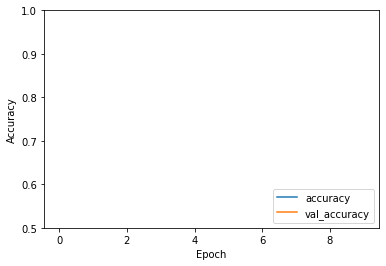

In [73]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)
print(test_acc)